In [1]:
import pandas as pd
import numpy as np
from numpy import nan, NaN,NAN
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [2]:
walmart=pd.read_csv("walmart_data.txt")
walmart

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [3]:
df=walmart.copy()
df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [4]:
df.shape

(550068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.isnull().sum()/len(df)*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category              0.0
Purchase                      0.0
dtype: float64

## **Observation-No null/missing values in data**

In [7]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


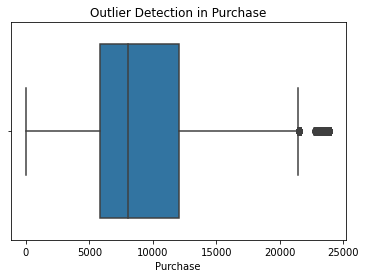

In [8]:
#Finding outliers in Purchase and removing them
sns.boxplot(df["Purchase"])
plt.title("Outlier Detection in Purchase")
plt.show()

In [9]:
q1=df["Purchase"].quantile(0.25)
q1

5823.0

In [10]:
q3=df["Purchase"].quantile(0.75)
q3

12054.0

In [11]:
iqr=1.5*stats.iqr(df["Purchase"])
iqr

9346.5

In [12]:
df.loc[(df["Purchase"]<q1-iqr) | (df["Purchase"]>q3+iqr)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


## **Observation 0.4% data in Purchase are outliers hence will remove them to get proper EDA**

In [13]:
#Outlier Removal
df=df.loc[(df["Purchase"]>=q1-iqr) & (df["Purchase"]<=q3+iqr)]
df.shape

(547391, 10)

In [14]:
#Statistical Info after Outlier removal in Purchase
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.473910e+05,547391.000000,547391.000000,547391.000000,547391.000000
mean,1.003028e+06,8.074627,0.409486,5.378945,9195.627195
std,1.727357e+03,6.521586,0.491739,3.927383,4938.872953
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5721.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,8038.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12019.000000
max,1.006040e+06,20.000000,1.000000,20.000000,21399.000000


In [15]:
#some basic analysis on the metrics to be used .Finding their unique values and counts
df["Age"].value_counts()

26-35    218661
36-45    109409
18-25     99334
46-50     45442
51-55     38191
55+       21322
0-17      15032
Name: Age, dtype: int64

In [16]:
df.groupby("Product_Category")["Product_Category"].count()

Product_Category
1     140378
2      23864
3      20213
4      11753
5     150933
6      20466
7       3721
8     113925
9        335
10      2850
11     24287
12      3947
13      5549
14      1523
15      5963
16      9828
17       578
18      3125
19      1603
20      2550
Name: Product_Category, dtype: int64

In [17]:
df.groupby(["Gender"])["Gender"].count()

Gender
F    135220
M    412171
Name: Gender, dtype: int64

## **Observation-After outlier removal the sample has data of 135220 female and 412171 male users in different  7 different age groups as listed above.Ther are purchases made in 20 different Product categories**

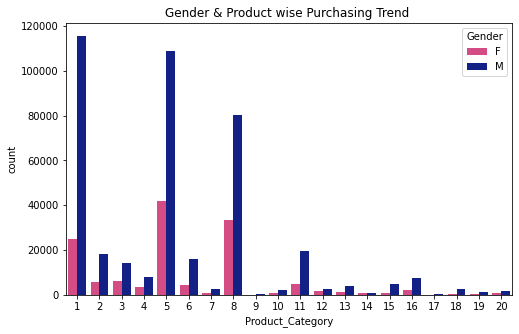

In [288]:
sns.countplot(x="Product_Category",data=df,hue="Gender")
plt.rcParams["figure.figsize"] = (5,5)
colors = [ "#EA3680","#00129A"]
plt.title("Gender & Product wise Purchasing Trend ")
sns.set_palette(sns.color_palette(colors))

## **Observation-Number of Purchases are more for Males and its in Product Category 1,5,8**

In [19]:
df.insert(10,"MaritalStatus",'')

In [20]:
idx=df.loc[df["Marital_Status"]==0].index
df.loc[idx,["MaritalStatus"]]="Single"

In [21]:
idx=df.loc[df["Marital_Status"]==1].index
df.loc[idx,["MaritalStatus"]]="Married"

In [234]:
pd.crosstab(index=df["Gender"],columns=[df["Age"],df["MaritalStatus"]],values=df["Purchase"],aggfunc="mean")

Age                   0-17        18-25                     26-35  \
MaritalStatus       Single      Married       Single      Married   
Gender                                                              
F              8276.806993  7906.885212  8454.645605  8855.320570   
M              9167.328686  9383.981537  9391.474502  9301.603198   

Age                               36-45                     46-50  \
MaritalStatus       Single      Married       Single      Married   
Gender                                                              
F              8547.536707  8775.970088  8959.602583  8796.934195   
M              9380.897651  9257.660794  9451.817399  9420.534880   

Age                               51-55                       55+               
MaritalStatus       Single      Married       Single      Married       Single  
Gender                                                                          
F              8697.189404  8891.257535  8992.112302  8965.655534  8664.879045  
M              8918.991751  9566.047927  9678.182273  9138.287396  9661.973360

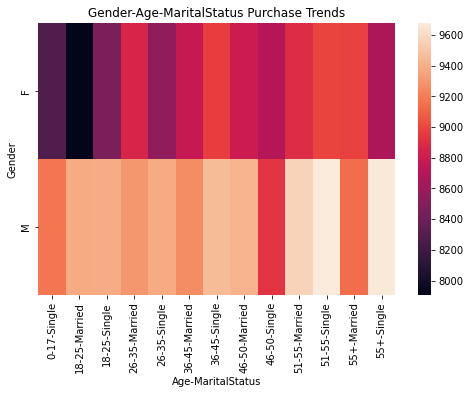

In [292]:
s=pd.crosstab(index=df["Gender"],columns=[df["Age"],df["MaritalStatus"]],values=df["Purchase"],aggfunc="mean")
sns.heatmap(s)
plt.rcParams["figure.figsize"] = (8,8)
plt.title("Gender-Age-MaritalStatus Purchase Trends")

plt.show()

## **Observation-Its interesting to note that for males till 45 years age groups people who are single tends to spend more ,But from 46 years age groups the married people have more purchases.As far a Females are considered, till 25 years of age they spend less but after this age their purchasing trend is quite similar wether they are married or not .**

In [25]:
df.groupby(["City_Category","Stay_In_Current_City_Years"])["Stay_In_Current_City_Years"].value_counts()*100/len(df)

City_Category  Stay_In_Current_City_Years  Stay_In_Current_City_Years
A              0                           0                              4.394300
               1                           1                              8.967813
               2                           2                              4.931210
               3                           3                              4.507747
               4+                          4+                             4.060169
B              0                           0                              5.218756
               1                           1                             15.161557
               2                           2                              7.601331
               3                           3                              7.763007
               4+                          4+                             6.293673
C              0                           0                              3.912194
               1 

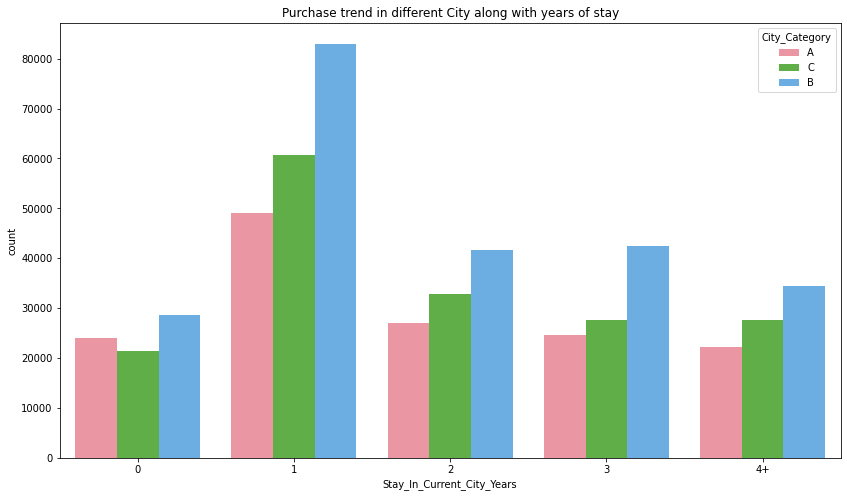

In [26]:
xorder=['0','1','2','3','4+']
sns.countplot(df["Stay_In_Current_City_Years"],hue=df["City_Category"],order=xorder)
plt.title("Purchase trend in different City along with years of stay")
plt.show()


## **Observation-Above plot shows that most of the purchases are done from city B regardless of the number of years of stay in that city.People with less than 1 year of stay has made least Number of  of purchases**

## **Recommendation-The number of purchases from city A and C are less compared to B .Perhaps the number of stores/outlets are less in these cities.Walmart can open more outlets here to improve Business**

# **Male Vs Female**

In [27]:
# Separating the male and female purchases into two data frames 
df_f=df.loc[df["Gender"]=='F']
df_f.reset_index(inplace=True)
df_f.drop("index",axis=1,inplace=True)
df_f

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,MaritalStatus
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370,Single
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200,Single
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422,Single
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057,Single
4,1000006,P00231342,F,51-55,9,A,1,0,5,5378,Single
...,...,...,...,...,...,...,...,...,...,...,...
135215,1006029,P00372445,F,26-35,1,C,1,1,20,599,Married
135216,1006035,P00375436,F,26-35,1,C,3,0,20,371,Single
135217,1006036,P00375436,F,26-35,15,B,4+,1,20,137,Married
135218,1006038,P00375436,F,55+,1,C,2,0,20,365,Single


In [28]:
df_m=df.loc[df["Gender"]=='M']
df_m.reset_index(inplace=True)
df_m.drop("index",axis=1,inplace=True)
df_m

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase,MaritalStatus
0,1000002,P00285442,M,55+,16,C,4+,0,8,7969,Single
1,1000003,P00193542,M,26-35,15,A,3,0,1,15227,Single
2,1000004,P00184942,M,46-50,7,B,2,1,1,19215,Married
3,1000004,P00346142,M,46-50,7,B,2,1,1,15854,Married
4,1000004,P0097242,M,46-50,7,B,2,1,1,15686,Married
...,...,...,...,...,...,...,...,...,...,...,...
412166,1006023,P00370853,M,26-35,0,C,2,1,19,61,Married
412167,1006024,P00372445,M,26-35,12,A,0,1,20,121,Married
412168,1006026,P00371644,M,36-45,6,C,1,1,20,494,Married
412169,1006032,P00372445,M,46-50,7,A,3,0,20,473,Single


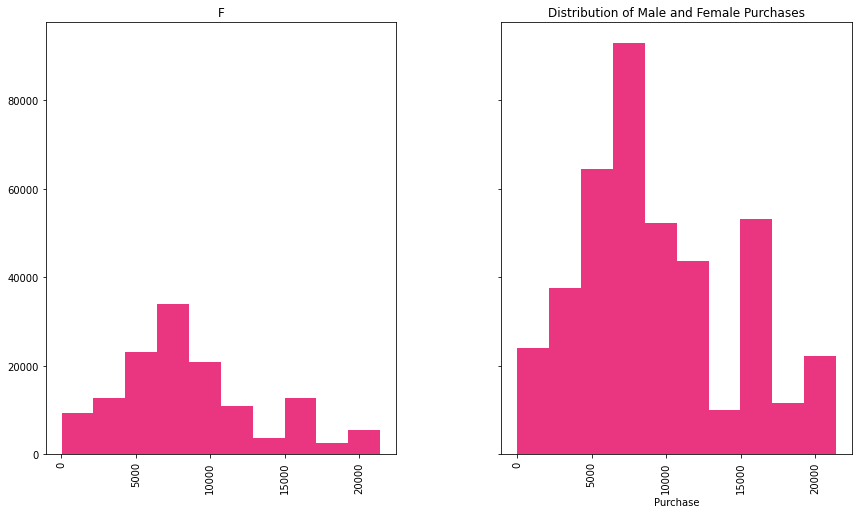

In [235]:
df.hist(column="Purchase",by="Gender",sharey=True)
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.title("Distribution of Male and Female Purchases")
plt.show()

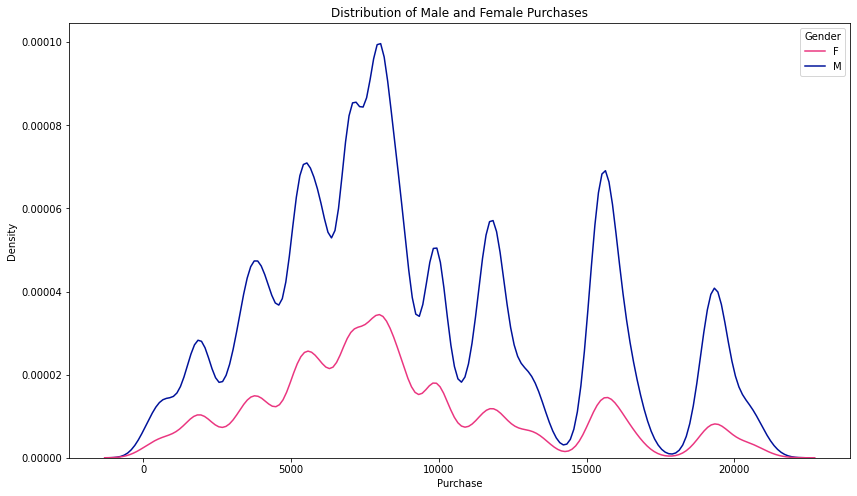

In [237]:
sns.kdeplot(df["Purchase"],hue=df["Gender"])
plt.title("Distribution of Male and Female Purchases")
plt.show()

## **Observation-The distribution is clearly not Gaussian ,Hence following Bootstrap method as given below**

The mean of Distribution of sample means is  8668.9 with Standard Deviation 214.96


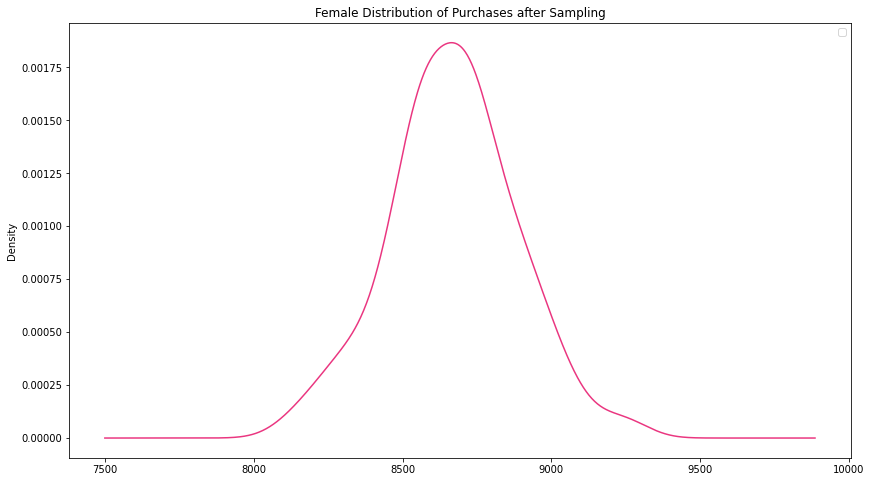

In [254]:
#Sampling the female population to a Normal Distribution
sample_mean_list=[]
number_of_times=200
for i in range (number_of_times):
    sample_data=df_f.sample(n=500)
    sample_mean=np.mean(sample_data["Purchase"])
    sample_mean_list.append(sample_mean)
s_mean=round(np.mean(sample_mean_list),2)
s_std=round(np.std(sample_mean_list),2)
print("The mean of Distribution of sample means is ",s_mean,"with Standard Deviation",s_std)
pd.DataFrame(sample_mean_list).plot(kind="density")
plt.title("Female Distribution of Purchases after Sampling")
plt.legend('')
plt.show()





## **Observation-From the female datapool ,500 samples were drawn .This was repeated 200 times.The resultant mean each time was plotted.The density plot shows its a Gaussian distribution with  mean centered almost same as the female dataset.The same experiment is repeated for male popuation and similar observation found**

The mean of Distribution of sample means is  9368.52 with Standard Deviation 238.68


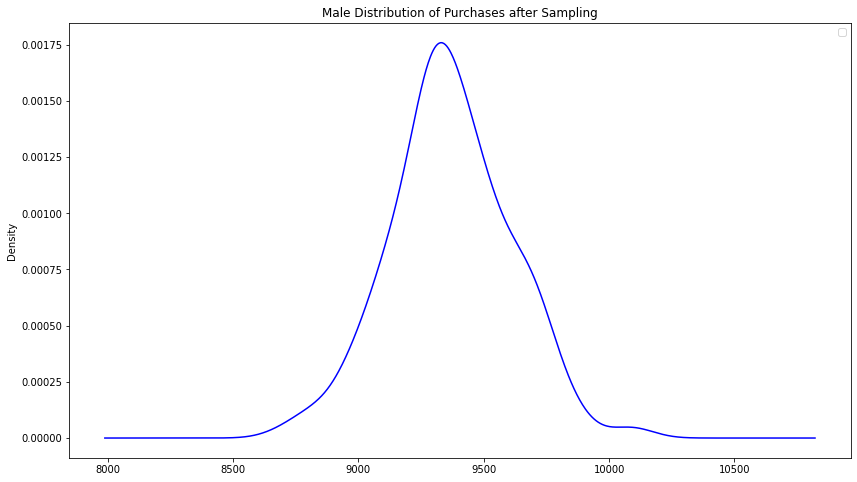

In [268]:
#Sampling the male population to a Normal Distribution
sample_mean_list=[]
number_of_times=200
for i in range (number_of_times):
    sample_data=df_m.sample(n=500,replace=True)
    sample_mean=np.mean(sample_data["Purchase"])
    sample_mean_list.append(sample_mean)
s_mean=round(np.mean(sample_mean_list),2)
s_std=round(np.std(sample_mean_list),2)
print("The mean of Distribution of sample means is ",s_mean,"with Standard Deviation",s_std)
pd.DataFrame(sample_mean_list).plot(kind="density",color="blue")
plt.title("Male Distribution of Purchases after Sampling")
plt.legend('')
plt.show()

In [35]:
#Bootstrapping to find the CI for females
bootstap_mean_list_f=[]
number_of_times=200
for i in range (number_of_times):
    sample_data=df_f.sample(n=len(df_f),replace=True)
    bootstrap_mean=np.mean(sample_data["Purchase"])
    bootstap_mean_list_f.append(bootstrap_mean)
confidence_interval_female=[]

for ci in (90,95,99):
    lb=(100-ci)/2
    ub=ci+(100-ci)/2
    confidence_interval_female.append(np.percentile(bootstap_mean_list_f,[lb,ub]))

In [280]:
confidence_interval_female#Confidence Interval for females with 90%,95%,99% confidence levels
mean_f=round(np.mean(bootstap_mean_list_f),2)
std_f=round(np.std(bootstap_mean_list_f),2)
print("The mean of sampled means is",mean_f,"dollars.The Mean purchase of the Female population is expected to be this with standard deviation",std_f)
print("90% Confidence Interval is [",round(confidence_interval_female[0][0],2),",",round(confidence_interval_female[0][1],2),"]")
print("95% Confidence Interval is [",round(confidence_interval_female[1][0],2),",",round(confidence_interval_female[1][1],2),"]")
print("99% Confidence Interval is [",round(confidence_interval_female[2][0],2),",",round(confidence_interval_female[2][1],2),"]")

The mean of sampled means is 8669.19 dollars.The Mean purchase of the Female population is expected to be this with standard deviation 13.46
90% Confidence Interval is [ 8647.45 , 8692.89 ]
95% Confidence Interval is [ 8644.33 , 8695.99 ]
99% Confidence Interval is [ 8640.52 , 8704.36 ]


In [260]:
#Bootstrapping to find the CI for males
bootstap_mean_list_m=[]
number_of_times=200
for i in range (number_of_times):
    sample_data=df_m.sample(n=len(df_m),replace=True)
    bootstrap_mean=np.mean(sample_data["Purchase"])
    bootstap_mean_list_m.append(bootstrap_mean)
confidence_interval_male=[]

for ci in (90,95,99):
    lb=(100-ci)/2
    ub=ci+(100-ci)/2
    confidence_interval_male.append(np.percentile(bootstap_mean_list_m,[lb,ub]))

In [281]:
mean_m=round(np.mean(bootstap_mean_list_m),2)
std_m=round(np.std(bootstap_mean_list_m),2)
print("The mean of sampled means is",mean_m,"dollars.The Mean purchase of the Male population is expected to be this value with Std Deviation.",std_m)
confidence_interval_male #Confidence Interval for males with 90%,95%,99% confidence levels
print("90% Confidence Interval is [",round(confidence_interval_male[0][0],2),",",round(confidence_interval_male[0][1],2),"]")
print("95% Confidence Interval is [",round(confidence_interval_male[1][0],2),",",round(confidence_interval_male[1][1],2),"]")
print("99% Confidence Interval is [",round(confidence_interval_male[2][0],2),",",round(confidence_interval_male[2][1],2),"]")

The mean of sampled means is 9367.29 dollars.The Mean purchase of the Male population is expected to be this value with Std Deviation. 7.27
90% Confidence Interval is [ 9356.22 , 9378.7 ]
95% Confidence Interval is [ 9354.27 , 9383.34 ]
99% Confidence Interval is [ 9352.09 , 9386.78 ]


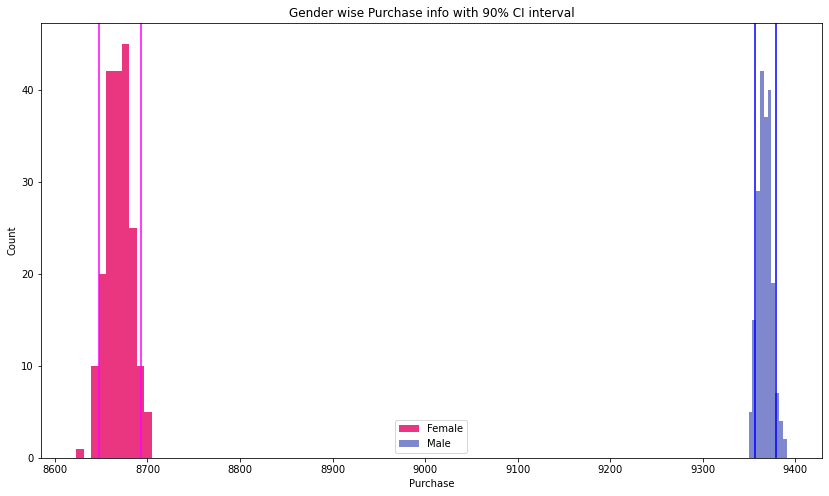

In [269]:
#Plot gender wise 90% CI
plt.hist(bootstap_mean_list_f,label="Female")
plt.hist(bootstap_mean_list_m,label="Male",alpha=.5)
plt.axvline(confidence_interval_male[0][0],c='b')
plt.axvline(confidence_interval_male[0][1],c='b')
plt.axvline(confidence_interval_female[0][0],color='magenta')
plt.axvline(confidence_interval_female[0][1],color='magenta')
plt.title("Gender wise Purchase info with 90% CI interval")
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.legend()
plt.show()

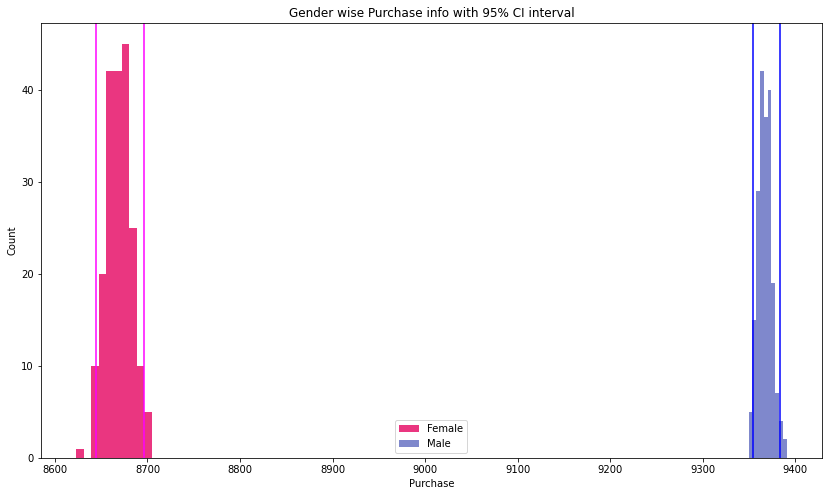

In [270]:
#Plot gender wise 95% CI
plt.hist(bootstap_mean_list_f,label="Female")
plt.hist(bootstap_mean_list_m,label="Male",alpha=.5)
plt.axvline(confidence_interval_male[1][0],c='b')
plt.axvline(confidence_interval_male[1][1],c='b')
plt.axvline(confidence_interval_female[1][0],color='magenta')
plt.axvline(confidence_interval_female[1][1],color='magenta')
plt.title("Gender wise Purchase info with 95% CI interval")
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.legend()
plt.show()

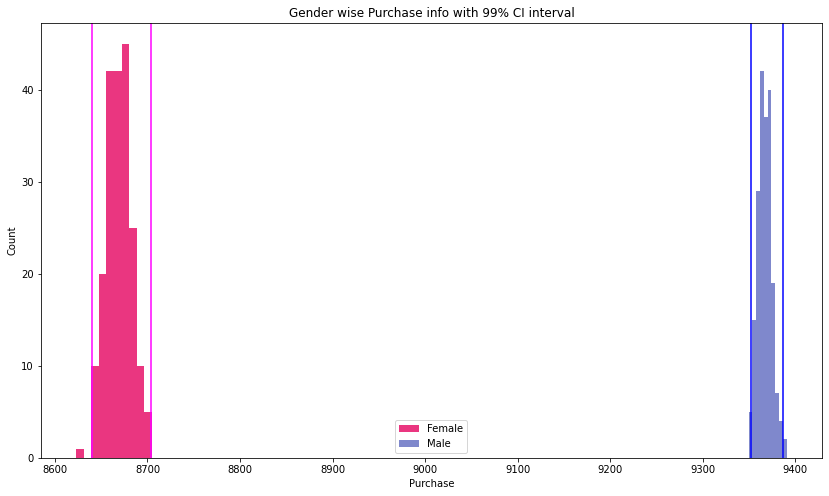

In [271]:
#Plot gender wise 99% CI
plt.hist(bootstap_mean_list_f,label="Female")
plt.hist(bootstap_mean_list_m,label="Male",alpha=.5)
plt.axvline(confidence_interval_male[2][0],c='b')
plt.axvline(confidence_interval_male[2][1],c='b')
plt.axvline(confidence_interval_female[2][0],color='magenta')
plt.axvline(confidence_interval_female[2][1],color='magenta')
plt.title("Gender wise Purchase info with 99% CI interval")
plt.xlabel("Purchase")
plt.ylabel("Count")
plt.legend()
plt.show()

## **Observation-The confidence intervals for male and female are non-overlapping which indicates that these groups are significantly different from each other.So how can we increase the business among the these group?**

In [42]:
#Female Purchase
df_f.groupby("Product_Category")["Purchase"].mean().sort_values(ascending=False).to_frame().head(10)

,Purchase
Product_Category,
10,16563.998433
7,16394.853659
6,15596.428164
16,14681.491257
15,14347.546734
9,13878.142857
14,13747.362761
1,13597.162619
2,11407.496819


In [294]:
#Male Purchase
df_m.groupby("Product_Category")["Purchase"].mean().sort_values(ascending=False).to_frame().head(10)

,Purchase
Product_Category,
10,16644.380199
7,16355.789777
6,15907.851009
16,14793.384056
15,14425.513889
9,13847.143369
1,13608.164721
14,12722.321111
2,11203.590520


## **Recommendation-The above output shows the top 10 product categories on which the female and male spend more.So business could improve if the stores have more stock of products in these categories.**

# **Single Vs Married**



In [43]:
df["MaritalStatus"].value_counts()

Single     323242
Married    224149
Name: MaritalStatus, dtype: int64

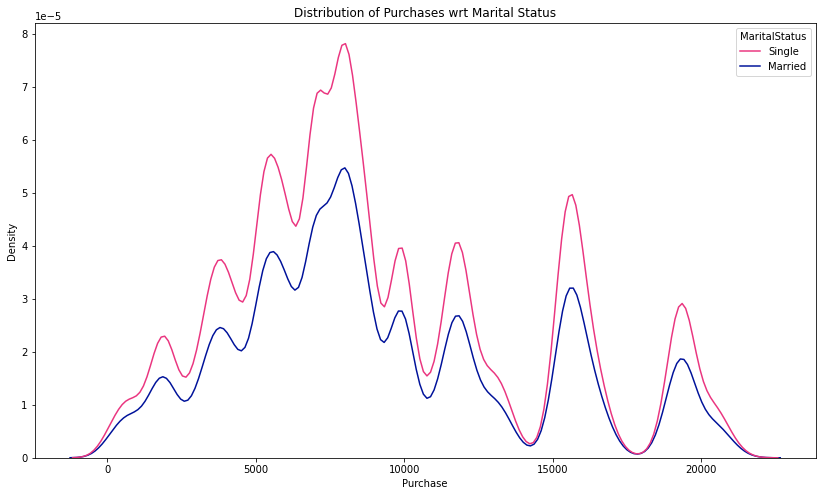

In [44]:
sns.kdeplot(df["Purchase"],hue=df["MaritalStatus"])
plt.title("Distribution of Purchases wrt Marital Status")
plt.show()

## **Observation-Its clearly not gaussian**

In [46]:
"""Inorder to reduce the redundancy in code,introducing two custom functions to split the dataframe and to Bootstrap
1)Function to split the dataframe df based 
on the column name and column value"""
def DataFrameSplit (df,column,value):
    name_dataframe="df_"+column+"_"+value
    x=df.loc[df[column]==value]
    x.reset_index(inplace=True)
    x.drop("index",axis=1,inplace=True)
    return name_dataframe,x
    

In [145]:
#Dataframe df is split based on column MaritalStatus and value=Single.The resultant dataframe is stored in dictionary dataframes
name,data=DataFrameSplit(df,"MaritalStatus","Single")
dataframes={}
dataframes[name] = data

                       



In [144]:
#initialsing dictionaries to store the confidence intervals and bootstrap means for the dataframes post the split
dataframes_namelist_pos=0
ci_dict={}
bootstrap_mean_dict={}

In [143]:
"""2)This function is used to find the bootstrapped means of the dataframes post the spilt and then find their confidence 
intervals
The bootstrapped means of each of the split dataframes are stored in dictionary bootstrap_mean_dict and the CI's of each of the 
split dataframes are stored in the dictionary ci_dict """
def BootStrapFunc(data):
    bootstap_mean_list=[]
    global dataframes_namelist_pos
    number_of_times=200
    for i in range (number_of_times):
        sample_data=data.sample(n=len(data),replace=True)
        bootstrap_mean=np.mean(sample_data["Purchase"])
        bootstap_mean_list.append(bootstrap_mean)
    c_interval=[]
    global ci_dict
    global bootstrap_mean_dict
    bootstrap_mean=np.mean(bootstap_mean_list)
    
    ci_name=list(dataframes.keys())[dataframes_namelist_pos]
    ci_name=ci_name+'_CI'
    
    bs_name=list(dataframes.keys())[dataframes_namelist_pos]
    bs_name=bs_name+"_BS"

    for ci in (90,95,99):
        lb=(100-ci)/2
        ub=ci+(100-ci)/2
        c_interval.append(np.percentile(bootstap_mean_list,[lb,ub]))
    print("Mean of the Sampling Distribution is",round(bootstrap_mean,2))
    print("90% Confidence Interval is [",round(c_interval[0][0],2),",",round(c_interval[0][1],2),"]")
    print("95% Confidence Interval is [",round(c_interval[1][0],2),",",round(c_interval[1][1],2),"]")
    print("99% Confidence Interval is [",round(c_interval[2][0],2),",",round(c_interval[2][1],2),"]")
    ci_dict[ci_name]=c_interval
    bootstrap_mean_dict[bs_name]=bootstap_mean_list
    
    dataframes_namelist_pos+=1

In [146]:
#BootStrapFunc function call on splitted dataframe to find CI
BootStrapFunc(dataframes['df_MaritalStatus_Single'])

Mean of the Sampling Distribution is 9201.98
90% Confidence Interval is [ 9188.19 , 9215.45 ]
95% Confidence Interval is [ 9186.06 , 9219.05 ]
99% Confidence Interval is [ 9178.08 , 9228.75 ]


In [147]:
#Repeat the same function calls for Marital Status=Married
name,data=DataFrameSplit(df,"MaritalStatus","Married")
dataframes[name]=data


In [148]:
BootStrapFunc(dataframes['df_MaritalStatus_Married'])

Mean of the Sampling Distribution is 9186.84
90% Confidence Interval is [ 9168.54 , 9203.38 ]
95% Confidence Interval is [ 9165.71 , 9210.8 ]
99% Confidence Interval is [ 9158.79 , 9218.18 ]


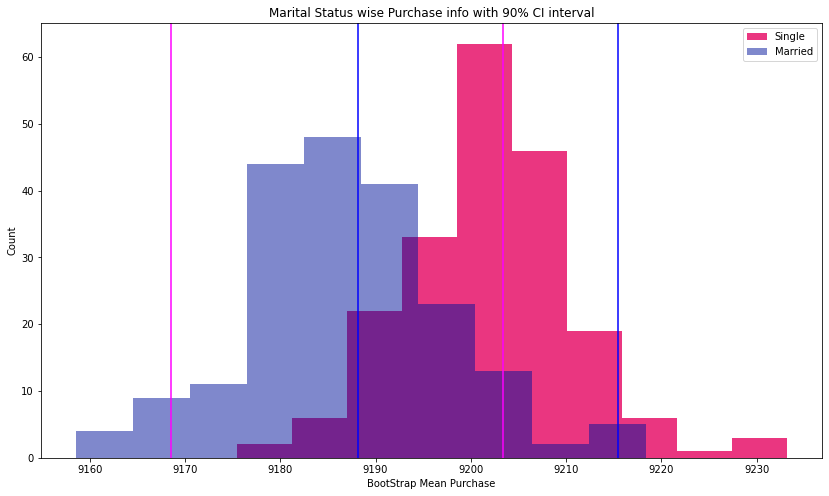

In [149]:
#Plot maritalstatus wise 90% CI
plt.hist(bootstrap_mean_dict["df_MaritalStatus_Single_BS"],label="Single")
plt.hist(bootstrap_mean_dict["df_MaritalStatus_Married_BS"],label="Married",alpha=.5)
plt.axvline(ci_dict['df_MaritalStatus_Single_CI'][0][0],c='b')
plt.axvline(ci_dict['df_MaritalStatus_Single_CI'][0][1],c='b')
plt.axvline(ci_dict['df_MaritalStatus_Married_CI'][0][0],color='magenta')
plt.axvline(ci_dict['df_MaritalStatus_Married_CI'][0][1],color='magenta')
plt.title("Marital Status wise Purchase info with 90% CI interval")
plt.xlabel("BootStrap Mean Purchase")
plt.ylabel("Count")
plt.legend()
plt.show()

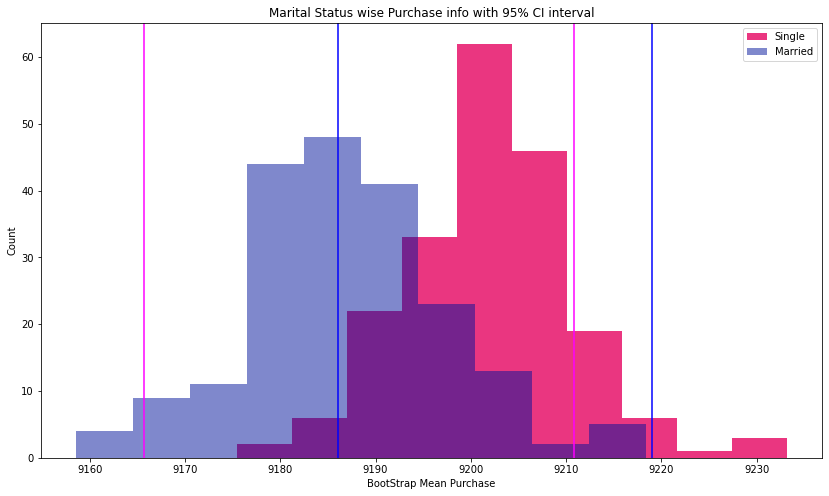

In [150]:
#Plot maritalstatus wise 95% CI
plt.hist(bootstrap_mean_dict["df_MaritalStatus_Single_BS"],label="Single")
plt.hist(bootstrap_mean_dict["df_MaritalStatus_Married_BS"],label="Married",alpha=.5)
plt.axvline(ci_dict['df_MaritalStatus_Single_CI'][1][0],c='b')
plt.axvline(ci_dict['df_MaritalStatus_Single_CI'][1][1],c='b')
plt.axvline(ci_dict['df_MaritalStatus_Married_CI'][1][0],color='magenta')
plt.axvline(ci_dict['df_MaritalStatus_Married_CI'][1][1],color='magenta')
plt.title("Marital Status wise Purchase info with 95% CI interval")
plt.xlabel("BootStrap Mean Purchase")
plt.ylabel("Count")
plt.legend()
plt.show()

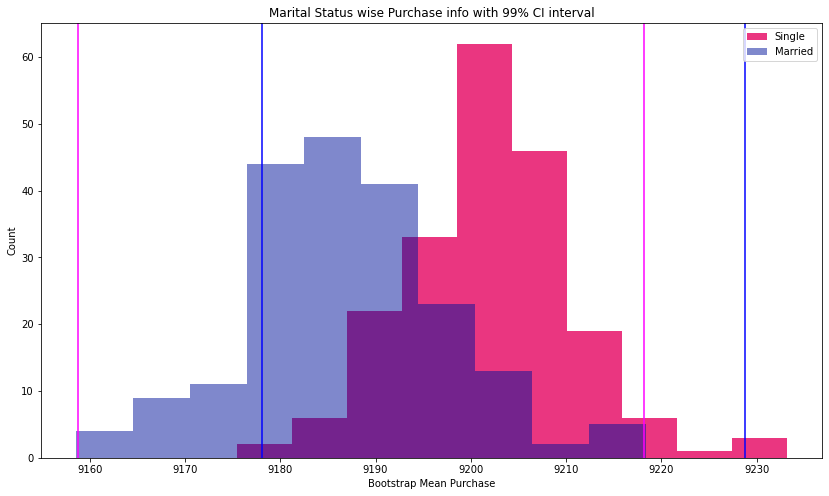

In [151]:
#Plot maritalstatus wise 99% CI
plt.hist(bootstrap_mean_dict["df_MaritalStatus_Single_BS"],label="Single")
plt.hist(bootstrap_mean_dict["df_MaritalStatus_Married_BS"],label="Married",alpha=.5)
plt.axvline(ci_dict['df_MaritalStatus_Single_CI'][2][0],c='b')
plt.axvline(ci_dict['df_MaritalStatus_Single_CI'][2][1],c='b')
plt.axvline(ci_dict['df_MaritalStatus_Married_CI'][2][0],color='magenta')
plt.axvline(ci_dict['df_MaritalStatus_Married_CI'][2][1],color='magenta')
plt.title("Marital Status wise Purchase info with 99% CI interval")
plt.xlabel("Bootstrap Mean Purchase")
plt.ylabel("Count")
plt.legend()
plt.show()

## **Observation:The mean purchase of people after Bootstrapping who are single (9201 dollars)are higher than those who are married(9186 dollars).The population mean for the respective groups is also expected to be around this value**

## **Observation-For all the three confidence levels ie 90%,95% and 99% there is overlap between the Single and Married groups.This suggests that there is no significant distinction between the two groups**

# **Based on Age Groups**

In [56]:
df_age=df.groupby(df["Age"])["Purchase"].mean().to_frame().reset_index()
df_age.rename(columns={"Purchase":"Mean Purchase"},inplace=True)
df_age

,Age,Mean Purchase
0,0-17,8867.447046
1,18-25,9124.031731
2,26-35,9193.469924
3,36-45,9254.202214
4,46-50,9128.985080
5,51-55,9423.121704
6,55+,9216.650220


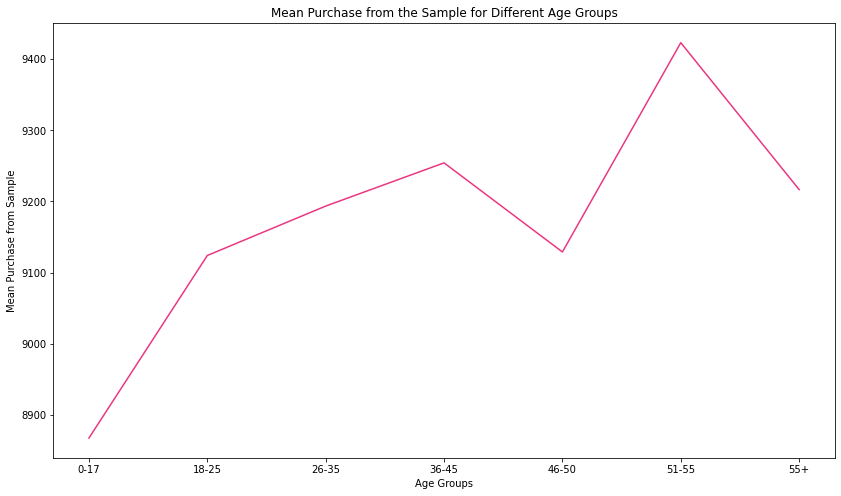

In [57]:
plt.plot(df_age["Age"],df_age["Mean Purchase"])
plt.xlabel("Age Groups")
plt.ylabel("Mean Purchase from Sample")
plt.title("Mean Purchase from the Sample for Different Age Groups")
plt.show()

## **Observation-The above plot shows the mean purchase of 51-55 age group is highest and the least is for 0-17 age group**

In [159]:
#re-initialsing dictionaries to store the split dataframes,confidenceintervals,bootstrap mean
dataframes_namelist_pos=0
ci_dict={}
bootstrap_mean_dict={}
dataframes={}

In [160]:
#Function call for datframe split
name,data=DataFrameSplit(df,"Age","0-17")
dataframes[name]=data

In [161]:
#BootStrapFunc function call on split dataframe to find CI
BootStrapFunc(dataframes['df_Age_0-17'])

Mean of the Sampling Distribution is 8867.32
90% Confidence Interval is [ 8803.25 , 8932.09 ]
95% Confidence Interval is [ 8793.71 , 8949.71 ]
99% Confidence Interval is [ 8766.84 , 8976.89 ]


In [162]:
#Dataframe splitting and Bootstrapping for other Age groups as well.Displaying their confidence intervals
name,data=DataFrameSplit(df,"Age","18-25")
dataframes[name]=data
BootStrapFunc(dataframes['df_Age_18-25'])

Mean of the Sampling Distribution is 9124.85
90% Confidence Interval is [ 9099.28 , 9148.54 ]
95% Confidence Interval is [ 9093.27 , 9150.67 ]
99% Confidence Interval is [ 9090.72 , 9163.97 ]


In [163]:
name,data=DataFrameSplit(df,"Age","26-35")
dataframes[name]=data
BootStrapFunc(dataframes['df_Age_26-35'])

Mean of the Sampling Distribution is 9193.22
90% Confidence Interval is [ 9177.85 , 9210.73 ]
95% Confidence Interval is [ 9175.66 , 9212.03 ]
99% Confidence Interval is [ 9169.25 , 9215.06 ]


In [164]:
name,data=DataFrameSplit(df,"Age","36-45")
dataframes[name]=data
BootStrapFunc(dataframes['df_Age_36-45'])

Mean of the Sampling Distribution is 9254.66
90% Confidence Interval is [ 9230.21 , 9276.43 ]
95% Confidence Interval is [ 9227.95 , 9284.63 ]
99% Confidence Interval is [ 9213.25 , 9292.19 ]


In [165]:
name,data=DataFrameSplit(df,"Age","46-50")
dataframes[name]=data
BootStrapFunc(dataframes['df_Age_46-50'])

Mean of the Sampling Distribution is 9130.45
90% Confidence Interval is [ 9093.19 , 9168.11 ]
95% Confidence Interval is [ 9082.21 , 9172.06 ]
99% Confidence Interval is [ 9057.16 , 9183.79 ]


In [166]:
name,data=DataFrameSplit(df,"Age","51-55")
dataframes[name]=data
BootStrapFunc(dataframes['df_Age_51-55'])

Mean of the Sampling Distribution is 9427.92
90% Confidence Interval is [ 9386.21 , 9468.97 ]
95% Confidence Interval is [ 9376.94 , 9477.93 ]
99% Confidence Interval is [ 9359.28 , 9492.2 ]


In [167]:
name,data=DataFrameSplit(df,"Age","55+")
dataframes[name]=data
BootStrapFunc(dataframes['df_Age_55+'])

Mean of the Sampling Distribution is 9214.88
90% Confidence Interval is [ 9160.95 , 9276.85 ]
95% Confidence Interval is [ 9146.5 , 9292.29 ]
99% Confidence Interval is [ 9123.67 , 9301.63 ]


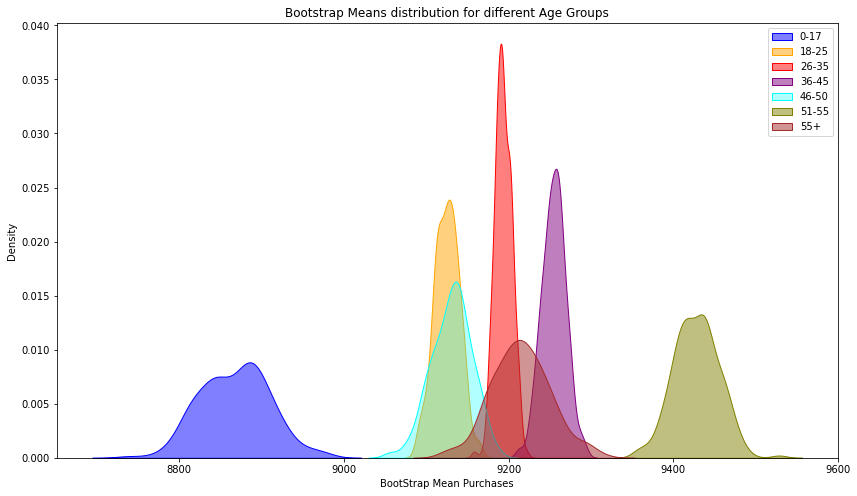

In [168]:
#Plot Bootstrap mean distribution
sns.kdeplot(bootstrap_mean_dict["df_Age_0-17_BS"],label="0-17",color="blue",alpha=.5,shade=True)
sns.kdeplot(bootstrap_mean_dict["df_Age_18-25_BS"],label="18-25",color="orange",alpha=.5,shade=True)
sns.kdeplot(bootstrap_mean_dict["df_Age_26-35_BS"],label="26-35",color="red",alpha=.5,shade=True)
sns.kdeplot(bootstrap_mean_dict["df_Age_36-45_BS"],label="36-45",color="purple",alpha=.5,shade=True)
sns.kdeplot(bootstrap_mean_dict["df_Age_46-50_BS"],label="46-50",color="cyan",alpha=.3,shade=True)
sns.kdeplot(bootstrap_mean_dict["df_Age_51-55_BS"],label="51-55",color="olive",alpha=.5,shade=True)
sns.kdeplot(bootstrap_mean_dict["df_Age_55+_BS"],label="55+",color="brown",alpha=.5,shade=True)
plt.legend()
plt.xlabel("BootStrap Mean Purchases")
plt.title("Bootstrap Means distribution for different Age Groups")
plt.show()

In [174]:
#To find the mean of the Boostrapped means of the samples for different age groups and storing in list bs_mean_list
bs_mean_list=[]
for key in bootstrap_mean_dict.keys():
    bs_mean=np.mean(bootstrap_mean_dict[key])
    bs_mean_list.append(bs_mean)
print(np.round(bs_mean_list,2))


[8867.32 9124.85 9193.22 9254.66 9130.45 9427.92 9214.88]


In [178]:
#To find the Margin of Error
y_err_list=[]
for key in ci_dict.keys():
    y_error_list=ci_dict[key][0]
    y_error=round((y_error_list[1]-y_error_list[0])/2,2)
    y_err_list.append(y_error)
print(y_err_list)


[64.42, 24.63, 16.44, 23.11, 37.46, 41.38, 57.95]


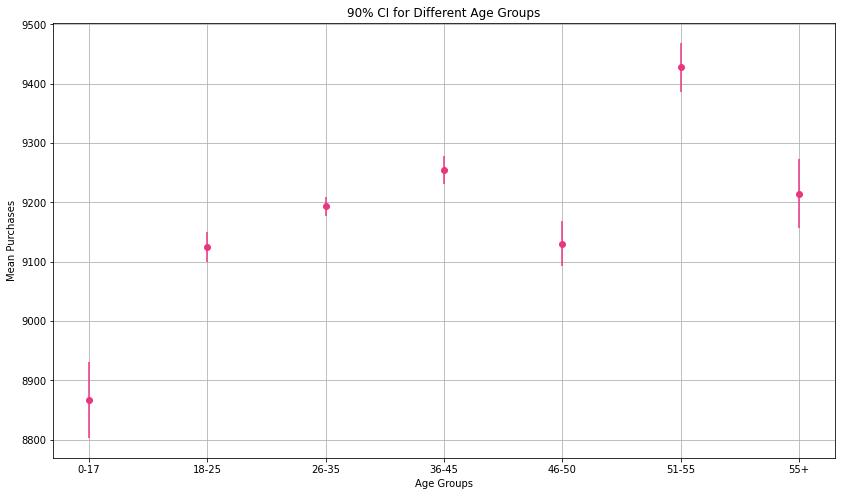

In [198]:
plt.errorbar(x=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],
             y=bs_mean_list,
             yerr=y_err_list,
             fmt='o'
            )
plt.xlabel("Age Groups")
plt.ylabel("Mean Purchases")
plt.title("90% CI for Different Age Groups")
plt.grid()

In [199]:
y_err_list=[]
for key in ci_dict.keys():
    y_error_list=ci_dict[key][1]
    y_error=round((y_error_list[1]-y_error_list[0])/2,2)
    y_err_list.append(y_error)
print(y_err_list)

[78.0, 28.7, 18.19, 28.34, 44.92, 50.5, 72.89]


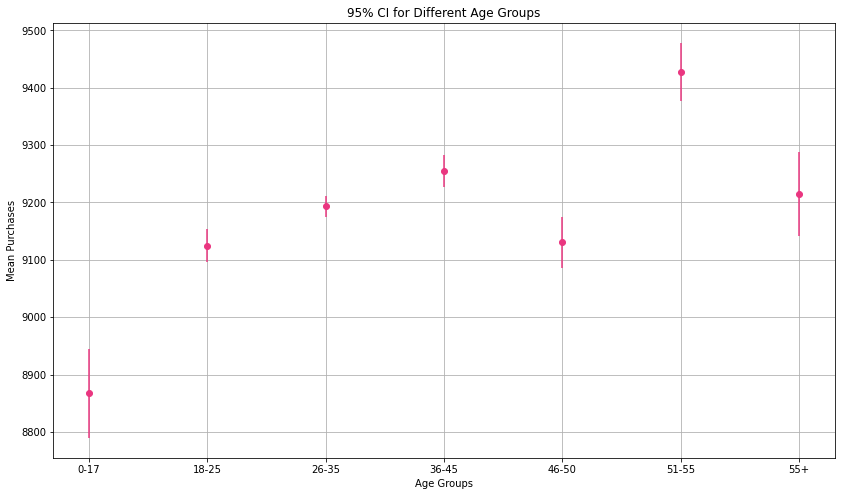

In [200]:
plt.errorbar(x=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],
             y=bs_mean_list,
             yerr=y_err_list,
             fmt='o'
            )
plt.xlabel("Age Groups")
plt.ylabel("Mean Purchases")
plt.title("95% CI for Different Age Groups")
plt.grid()

In [201]:
y_err_list=[]
for key in ci_dict.keys():
    y_error_list=ci_dict[key][2]
    y_error=round((y_error_list[1]-y_error_list[0])/2,2)
    y_err_list.append(y_error)
print(y_err_list)

[105.03, 36.63, 22.9, 39.47, 63.31, 66.46, 88.98]


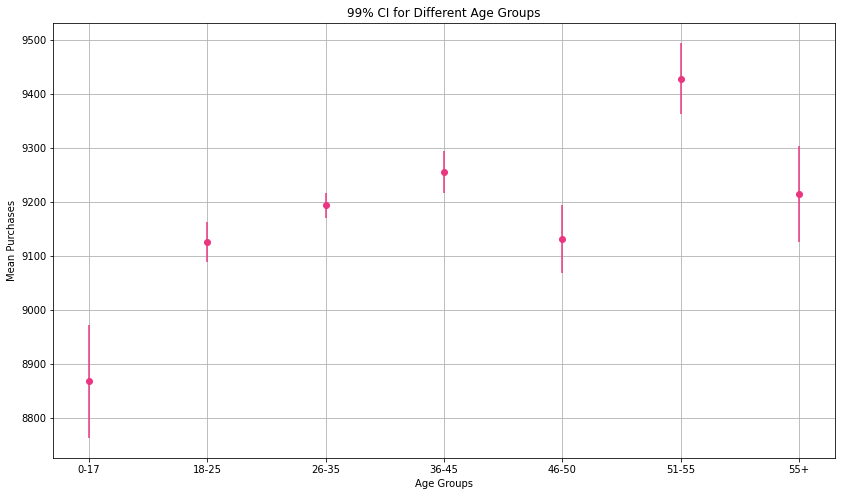

In [202]:
plt.errorbar(x=["0-17","18-25","26-35","36-45","46-50","51-55","55+"],
             y=bs_mean_list,
             yerr=y_err_list,
             fmt='o'
            )
plt.xlabel("Age Groups")
plt.ylabel("Mean Purchases")
plt.title("99% CI for Different Age Groups")
plt.grid()

## **Observation -Expect for age groups 0-17 and 51-55 all the others are having overlapping Confidence Intervals.So a significant distinction cannot be made for these groups.The groups with significant difference is 0-17 and 51-55 age groups.So how the business can be improved here?**

In [208]:
df_fil=df.loc[(df["Age"]=='0-17')|(df["Age"]=='51-55')]

In [228]:
x=(df_fil.groupby(["Age","Product_Category"])["Purchase"].sum()/1000000).to_frame()
x.rename(columns={"Purchase":"Purchase(in Millions)"},inplace=True)

x


Purchase(in Millions)
Age   Product_Category                       
0-17  1                             48.783247
      2                              8.735846
      3                             11.317806
      4                              1.701452
      5                             27.059712
      6                              6.377154
      7                              0.821014
      8                             17.234789
      9                              0.223799
      10                             0.930677
      11                             3.558043
      12                             0.177964
      13                             0.082573
      14                             0.512227
      15                             2.256570
      16                             3.351633
      17                             0.060863
      18                             0.074703
      19                             0.002271
      20                             0.033121
51-55 1                            127.824120
      2                             21.196838
      3                              9.542540
      4                              1.658375
      5                             64.326214
      6                             23.529307
      7                              4.356259
      8                             72.591375
      9                              0.330243
      10                             4.214537
      11                             6.748072
      12                             0.597719
      13                             0.368453
      14                             2.180826
      15                             7.451186
      16                            10.503288
      17                             1.127567
      18                             1.254082
      19                             0.005080
      20                             0.072360

## **Recommendation-For age groups 0-17  the larger sales are in product categories 1,3,5, 8.And for age group 51-55 its for categories 1,2,3,5,6,8,16.Hence business can be improved for these categories for these age groups**

In [229]:
y=(df_fil.groupby(["Age","City_Category"])["Purchase"].sum()/1000000).to_frame()
y.rename(columns={"Purchase":"Purchase(in Millions)"},inplace=True)

y


Purchase(in Millions)
Age   City_Category                       
0-17  A                          21.474755
      B                          47.725963
      C                          64.094746
51-55 A                          56.967864
      B                         162.551363
      C                         140.359214

## **Recommendation-For both 0-17 and 51-55 age groups the sales are higher in cities B and C .Hence opening more stores in these cities can improve the business**
